<a href="https://colab.research.google.com/github/adalves-ufabc/2022.Q2-PLN/blob/main/2022_Q2_PLN_Notebook_35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2022.Q2]**
Prof. Alexandre Donizeti Alves

### **Técnicas Avançadas de PLN**
----

**Extração de Substantivos**

In [ ]:
import nltk

nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from textblob import TextBlob

# extract noun
blob = TextBlob("John is learning natural language processing")
for np in blob.noun_phrases:
    print(np)

john
natural language processing


**Correspondência Fonética**

`Soundex` é um sistema em que valores são atribuídos a nomes de maneira que nomes com sons semelhantes obtenham o mesmo valor. Esses valores são conhecidos como **codificações soundex**. Um aplicativo de pesquisa baseado em `soundex` não pesquisará por um nome diretamente, mas sim pela **codificação de soundex**. Ao fazer isso, ele obterá todos os nomes que soam como o nome que está sendo procurado.

In [ ]:
!pip install jellyfish

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 14.9 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73985 sha256=1fee2b520a4bda851391fe5d47784043b540aaa3586ee2e3d2ed1e8e3a486e08
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [ ]:
from jellyfish import soundex

print(soundex("natural"))
print(soundex("natuaral"))

N364
N364


In [ ]:
print(soundex("two"))
print(soundex("to"))

T000
T000


In [ ]:
soundex('language')

'L522'

In [ ]:
soundex('processing')

'P622'

In [ ]:
from itertools import groupby

def getSoundexList(dList):
    return sorted([soundex(x) for x in dList])

dataList = ['two','fourth','forth','dessert','to','desert']    
print([list(g) for _, g in groupby(getSoundexList(dataList), lambda x: x)])

[['D263', 'D263'], ['F630', 'F630'], ['T000', 'T000']]


In [ ]:
from operator import itemgetter

def getSoundexDict(dList):
    return sorted(dict_.items(), key=itemgetter(1))  # sorting the dict_ on val

dataList = ['two','fourth','forth','dessert','to','desert']
res = [soundex(x) for x in dataList]    # to get the val for each elem
dict_ = dict(list(zip(dataList, res)))  # dict_ with k,v as name/val

print([list(g) for _, g in groupby(getSoundexDict(dataList), lambda x: x[1])])

[[('dessert', 'D263'), ('desert', 'D263')], [('fourth', 'F630'), ('forth', 'F630')], [('two', 'T000'), ('to', 'T000')]]


**Conversão de Texto em Fala**


In [ ]:
!pip install gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gtts import gTTS

# chooses the language, English(‘en’)
convert = gTTS(text='I like this NLP book', lang='en', slow=False) 
  
# saving the converted audio in a mp3 file named 
convert.save("audio.mp3")

In [ ]:
from gtts import gTTS 

voz = gTTS("Olá, tudo bem?", lang ="pt") 
voz.save("voz.mp3")

**Deteção de Idioma e Tradução**

In [ ]:
!pip install goslate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import goslate

text = "Bonjour le monde" 
gs = goslate.Goslate()
translatedText = gs.translate(text,'en')

print(translatedText)

Hi world


In [ ]:
import goslate

gs = goslate.Goslate()

language_id = gs.detect('hallo welt')
language_id

'de'

In [ ]:
gs.get_languages()[language_id]

'German'

In [ ]:
import goslate

gs = goslate.Goslate()

language_id = gs.detect('Boas férias')

print(language_id)
gs.get_languages()[language_id]


pt


'Portuguese'

**Corretor Ortográfico**

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

a = "cmputr"		 # incorrect spelling
print("original text: "+str(a))

b = TextBlob(a)

# prints the corrected spelling
print("corrected text: "+str(b.correct()))

original text: cmputr
corrected text: computer


In [ ]:
from textblob import Word
 
word = Word('percieve')
 
word.spellcheck()
 

[('perceive', 1.0)]

In [ ]:
word = Word('personell')
word.spellcheck()

[('personal', 0.65),
 ('personally', 0.2642857142857143),
 ('peroneal', 0.06428571428571428),
 ('personnel', 0.014285714285714285),
 ('personen', 0.007142857142857143)]

In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 24.8 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=9dafb854090943bb4f6210c8a0445d62dd0aebbd575394b10e08c5db68eba807
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [ ]:
from autocorrect import Speller
 
check = Speller(lang='en')

In [ ]:
check("does this sentece have misspelled wordz?")

'does this sentence have misspelled word?'

In [ ]:
!pip install pyspellchecker 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 26.6 MB/s 


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

spell.correction("liberry") # liberty

'liberty'

In [ ]:
word = Word("liberry")
word.spellcheck() # liberty

[('liberty', 1.0)]

In [ ]:
check("liberry") # liberty

'liberty'

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(["cmputr", "watr", "study", "wrie"])

for word in misspelled:
	# Get the one `most likely` answer
	print(spell.correction(word))

	# Get a list of `likely` options
	print(spell.candidates(word))


computer
{'compute', 'computer', 'caputo', 'impute', 'caput'}
water
{'watc', 'wats', 'atr', 'waar', 'water', 'wat', 'wate', 'wart', 'wanr', 'war', 'watt', 'wath'}
write
{'wire', 'rie', 'irie', 'erie', 'frie', 'write', 'wri', 'wre', 'drie', 'brie', 'trie', 'prie', 'wrte', 'whie', 'writ', 'wie'}


**Mais informações em**:

> https://pypi.org/project/pyspellchecker/

**Referência**:

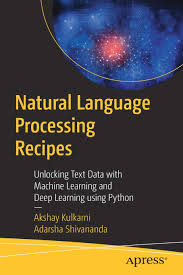

**Disponível em**:

> https://github.com/Apress/natural-language-processing-recipes